In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DATA_PATH = '../data/spotify/'

# Loading the data

In [4]:
tracks_df = pd.read_csv(DATA_PATH + 'michael_jackson_full_df.csv').drop(['Unnamed: 0'], axis=1)
analysis_df = tracks_df[['name_track', 'duration_ms', 'explicit', 'featuring',\
                         'danceability', 'energy','key', 'loudness', 'mode', \
                         'speechiness', 'acousticness','instrumentalness',\
                         'liveness', 'valence', 'tempo', 'time_signature']]
analysis_df.featuring = analysis_df.featuring.map(lambda feat: 1 if feat else 0)
analysis_df.explicit = analysis_df.featuring.map(lambda expl: 1 if expl else 0)

/Users/jsalomon/Anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Primary analysis

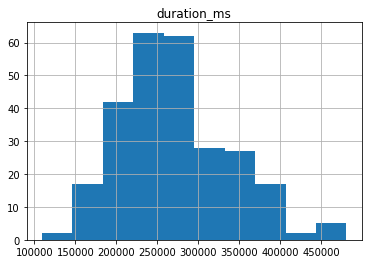

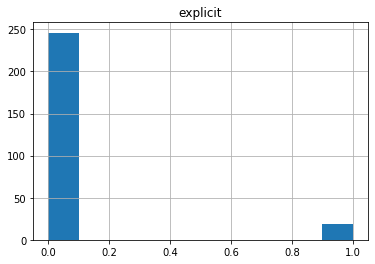

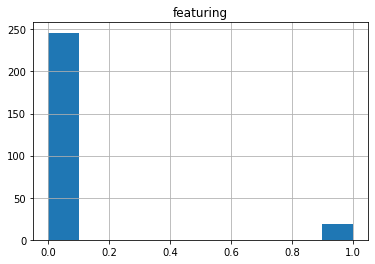

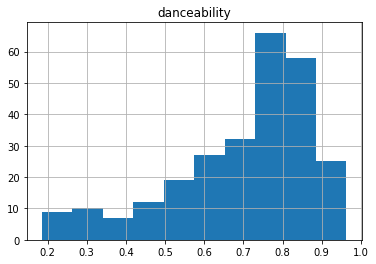

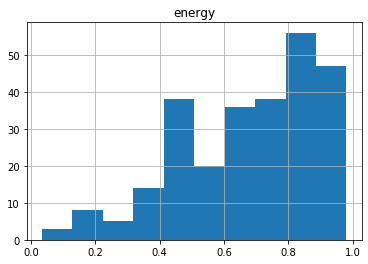

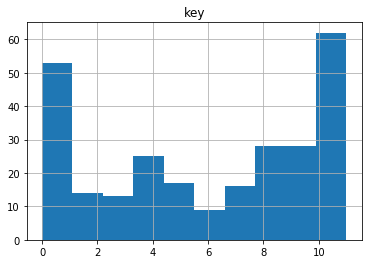

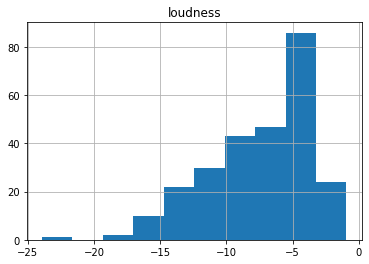

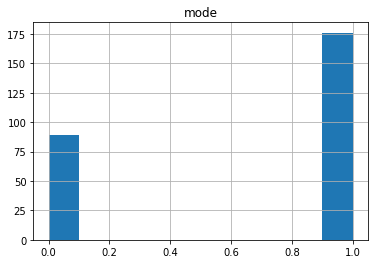

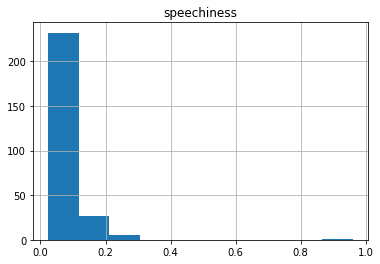

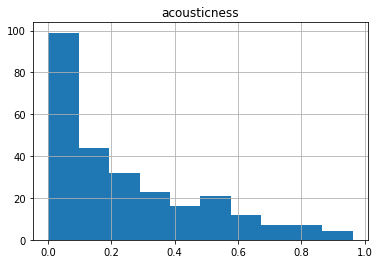

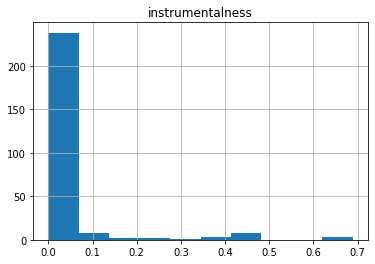

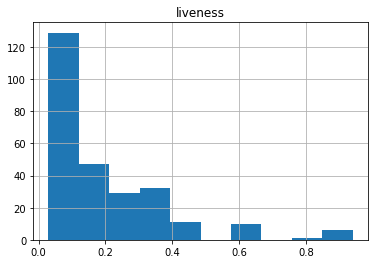

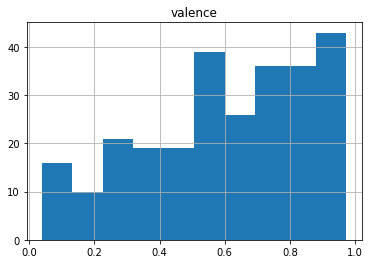

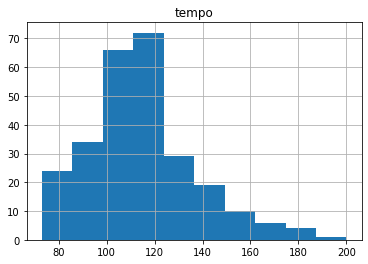

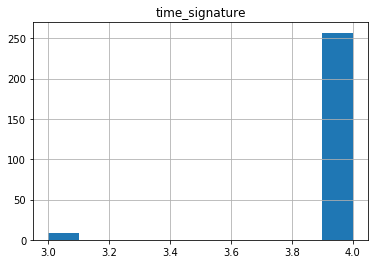

In [5]:
features = analysis_df.drop('name_track', axis=1).columns
for feature in analysis_df.drop('name_track', axis=1):
    analysis_df.hist(feature)

These plots show us the distribution of the musical signature of MJ's songs. 

Coupled with research on these features, we will be able to visualize, by combining some features, the different types of MJ's songs.

It would then be interesting to group the songs by their audio features.

A word on the musical features:

* Key: estimated overall key of the track
* Acousticness: how confident are we that the track is acoustic (not electronic)
* Danceability: how suitable a track is for dancing; based on **tempo**, **rythm stability**, **beat strength** and overall **regularity**.
* Energy: intensity and activity of the song; the songs with high energy feel fast, loud and noisy
* Instrumentalness: close to 1.0 if there are no vocals in songs
* Liveness: close to 1.0 if there seems to have an audience (live recording)
* Loudness: average of the track in dB
* Speechiness: spoken words in the songs ==> could be an interview/podcast or even presence of a narrative in a track
* Valence: Positivity of a track
* tempo: overall tempo of a track in bpm.


From their description some features should be correlated.

In [6]:
correlation = analysis_df.drop('name_track', axis=1).corr()

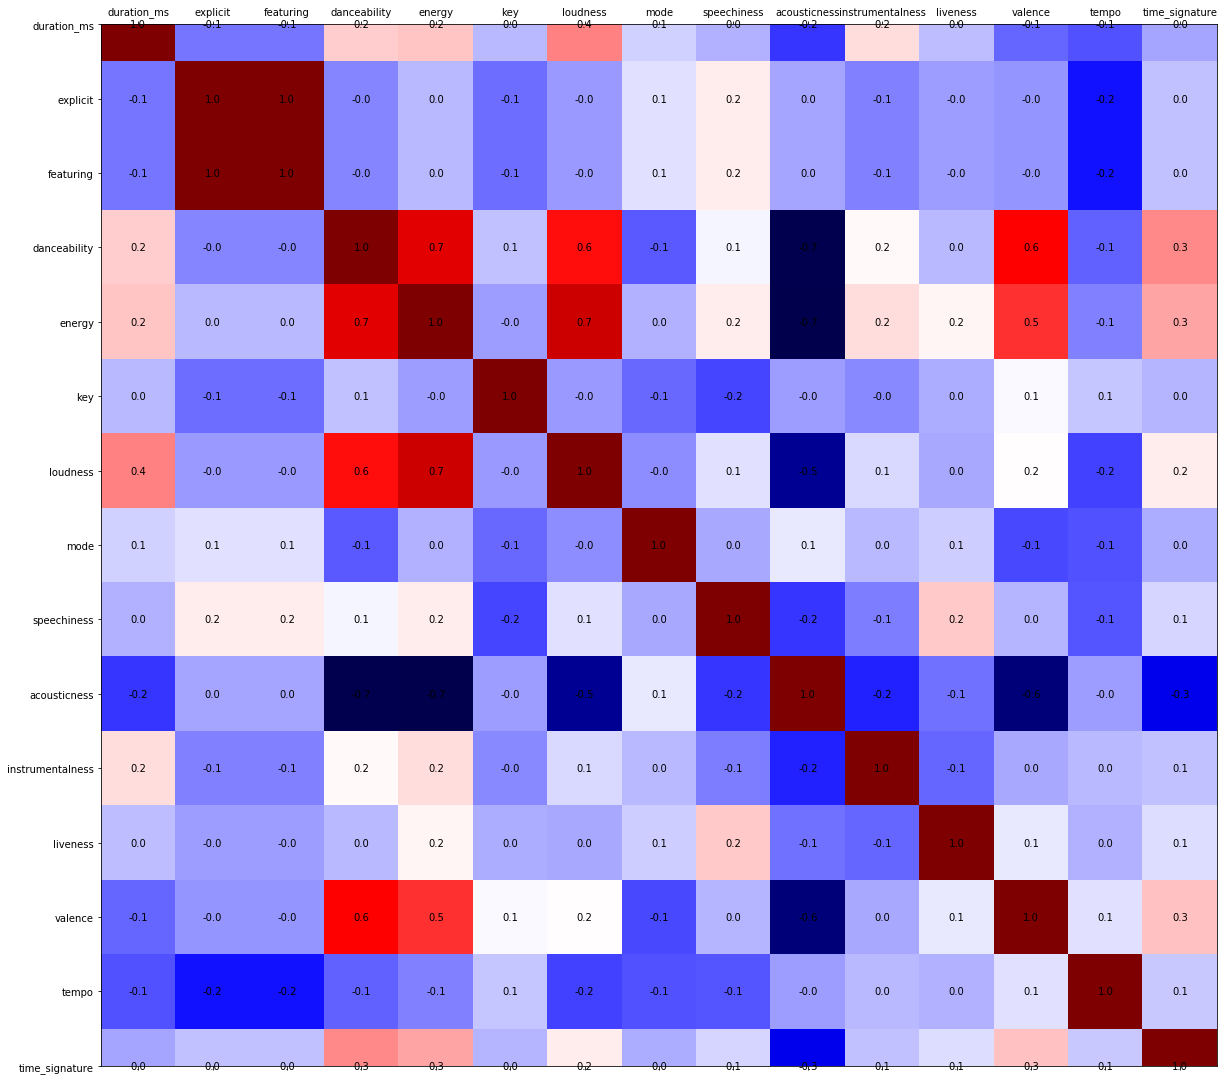

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(correlation, cmap='seismic')

for (i, j), z in np.ndenumerate(correlation):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
cols = analysis_df.drop('name_track', axis=1).columns

plt.yticks(np.arange(0, len(cols), 1), cols)
plt.xticks(np.arange(0, len(cols), 1), cols);

plt.show()

Even though all the features are mostly decorelated, there are a few things to note:
* Danceability is highly correlated to energy, loudness and valence
* Energy and loudness are correlated as well
* On the opposite, acousticness and danceability, energy, loudness are highly decorrelated

Is it in general? Is it for MJ?

# Clustering

In [8]:
tracks_features_df = tracks_df[['name_track', 'danceability', 'energy', 'duration_ms', 'key', 'loudness',\
                                'mode', 'speechiness', 'acousticness', 'instrumentalness',\
                                'liveness', 'valence', 'tempo', 'time_signature', 'uri_track']]

In [9]:
tracks_features_df

,name_track,danceability,energy,duration_ms,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,uri_track
0,This Place Hotel (a.k.a. Heartbreak Hotel),0.731,0.851,343413,4,-4.085,0,0.1030,0.2430,0.000142,0.1170,0.582,97.005,4,spotify:track:2BU4dK1fu1CFLjTBz7ju7Q
1,Thriller,0.764,0.887,358053,11,-3.725,1,0.0738,0.0816,0.000108,0.8470,0.721,118.421,4,spotify:track:7azo4rpSUh8nXgtonC6Pkq
2,Blood on the Dance Floor,0.806,0.816,253373,1,-2.767,1,0.0764,0.0148,0.009780,0.0623,0.520,108.980,4,spotify:track:0QgsvILuE9VQiAVsLStD3W
3,Somebody's Watching Me - Single Version,0.767,0.712,237760,1,-4.128,0,0.0324,0.0409,0.000081,0.1320,0.804,124.091,4,spotify:track:6A4Jc8npNo79BOgsrPptLA
4,Dirty Diana - 2012 Remaster,0.734,0.801,280946,3,-4.525,1,0.0437,0.1780,0.000401,0.3240,0.331,131.424,4,spotify:track:4FC7GMnGwYeAjuvC83Srbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Doggin' Around,0.403,0.759,172866,0,-10.920,1,0.0524,0.2480,0.000246,0.0932,0.897,94.041,3,spotify:track:4Lmu0By2w5pHiLkKN6Xr44
261,Johnny Raven,0.670,0.698,213893,10,-10.498,1,0.0295,0.4260,0.000354,0.1180,0.877,111.809,4,spotify:track:4tizeXJqI5BP4IU4xJJEJm
262,Euphoria,0.473,0.742,170666,9,-11.202,0,0.1170,0.1540,0.004140,0.1510,0.876,151.037,4,spotify:track:0QGze7AKyvgFCRfABSj0WN
263,Morning Glow,0.599,0.461,217973,8,-11.723,1,0.0244,0.2250,0.000352,0.1070,0.744,101.105,4,spotify:track:1xwdyB2h7UN7pQyITEm3nK


We used 17 clusters, as it is the number of MJs album, to see if each album had similar audio features.

We see that depending on the album there are many clusters. Doing an audio features visualization would then be more intersting than situating MJ's albums on a graph. We can link songs together by albums or audio features to compare the lyrical analysis, and the insights the visualization will show will be different.

Labelling the data in that sence, allows to know which songs a musically similar. In order to visulaize this we can use radar charts. 

This type of musical clustering can be intersting coupled with the lyrical analysis such as sentiment analysis and topic modelling. We could show for example that songs with positive lyrics have the same audio features.

To do a further analysis on the features, we can couple features together (danceability and loudness for example) to also visualize which songs are better depending on context (party, background music...).

In [10]:
import sklearn.cluster

def create_clusters(num=10, plot=True):
    data = analysis_df.drop('name_track', axis=1)
    model = sklearn.cluster.KMeans(n_clusters=10).fit(data)
    analysis_df['musicality_cluster'] = model.predict(analysis_df.drop('name_track', axis=1))
    if plot:
        analysis_df.hist('musicality_cluster')
        analysis_df.plot.scatter('danceability', 'valence', c='musicality_cluster',colormap='viridis')
        
    data = analysis_df[['danceability', 'loudness', 'energy', 'time_signature']]

    model = sklearn.cluster.KMeans(n_clusters=10).fit(data)
    analysis_df['danceability_cluster'] = model.predict(analysis_df[['danceability', 'loudness', 'energy', 'time_signature']])
    if plot:
        analysis_df.hist('danceability_cluster')
        analysis_df.plot.scatter('danceability', 'key', c='danceability_cluster',colormap='viridis')
    
    data = analysis_df[['danceability']]

    model = sklearn.cluster.KMeans(n_clusters=10).fit(data)
    analysis_df['danceability_cluster2'] = model.predict(analysis_df[['danceability']])
    if plot:
        analysis_df.hist('danceability_cluster2')
        analysis_df.plot.scatter('danceability', 'key', c='danceability_cluster2',colormap='viridis')
        
    data = analysis_df[['valence']]

    model = sklearn.cluster.KMeans(n_clusters=10).fit(data)
    analysis_df['valence_cluster'] = model.predict(analysis_df[['valence']])
    if plot:
        analysis_df.hist('valence_cluster')
        analysis_df.plot.scatter('valence', 'key', c='valence_cluster',colormap='viridis')
        
    data = analysis_df[['tempo']]

    model = sklearn.cluster.KMeans(n_clusters=10).fit(data)
    analysis_df['tempo_cluster'] = model.predict(analysis_df[['tempo']])
    if plot:
        analysis_df.hist('tempo_cluster')
        analysis_df.plot.scatter('tempo', 'danceability', c='tempo_cluster',colormap='viridis')
        
    if plot:
        from pandas.plotting import scatter_matrix

        clusters = analysis_df[['musicality_cluster', 'danceability_cluster', 'valence_cluster', 'tempo_cluster']]
        label_given_feature = scatter_matrix(clusters, alpha=0.2, figsize=(20, 20))[-1]

/Users/jsalomon/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jsalomon/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jsalomon/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

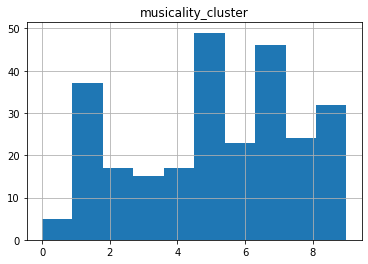

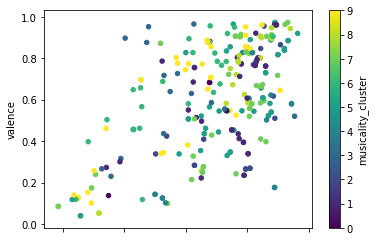

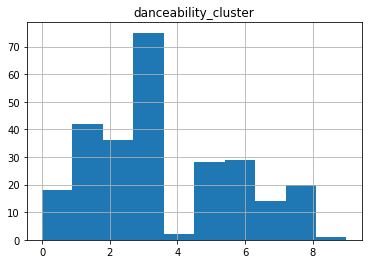

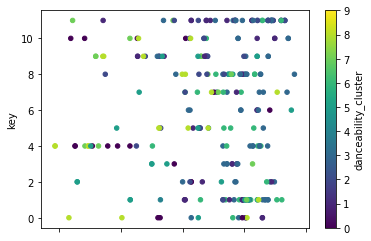

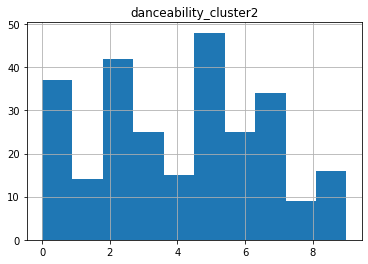

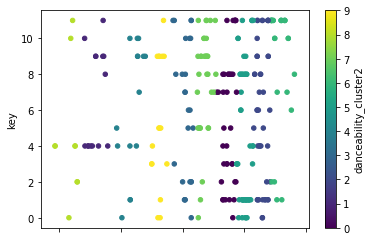

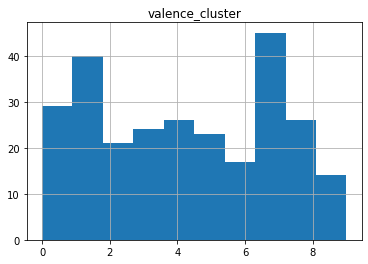

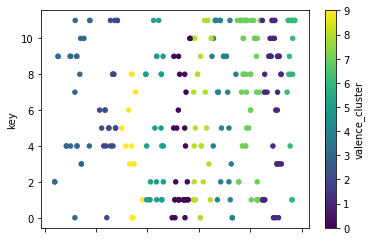

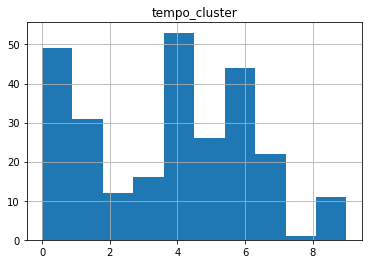

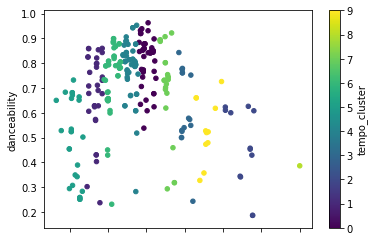

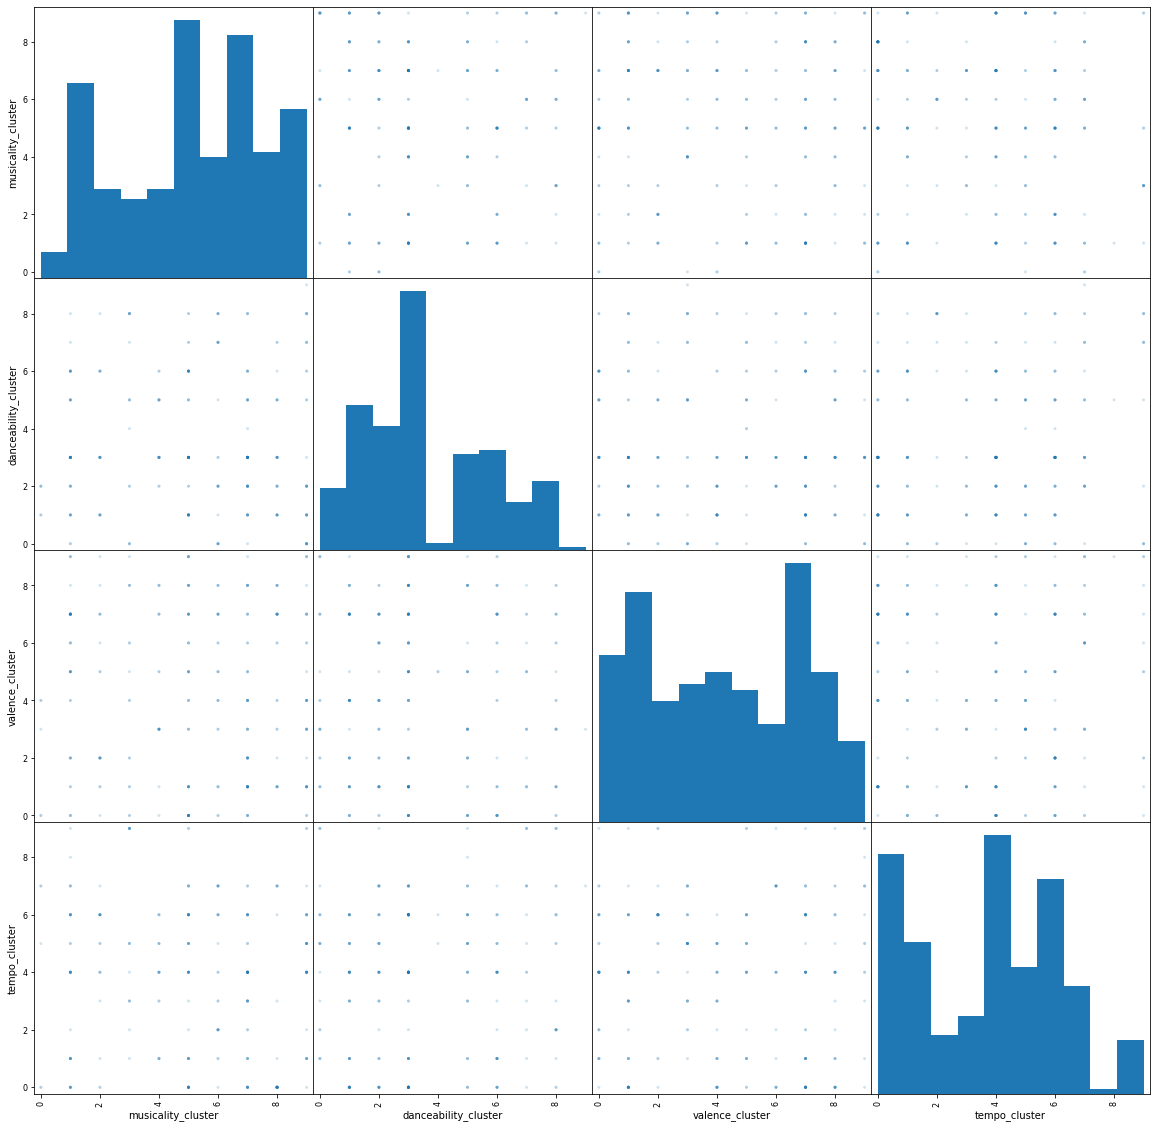

In [11]:
create_clusters()

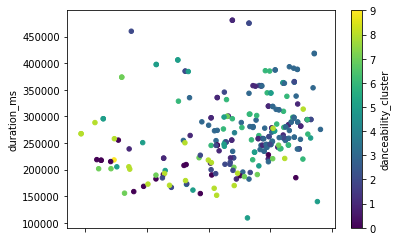

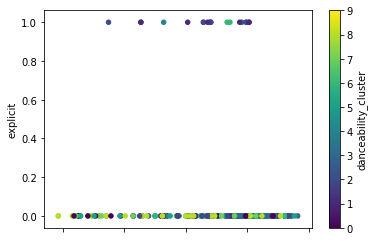

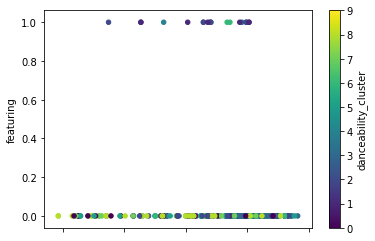

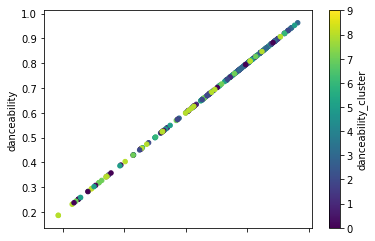

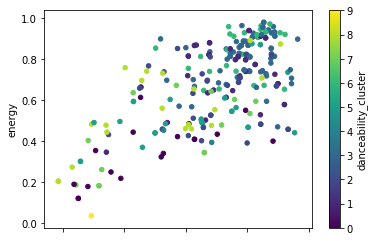

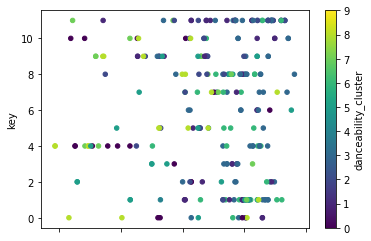

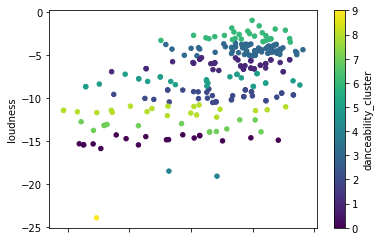

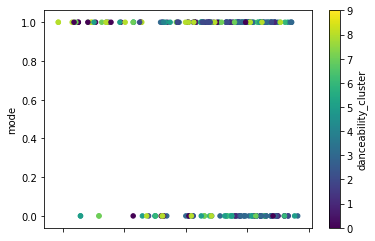

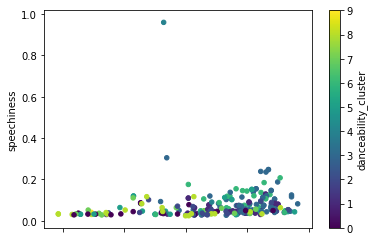

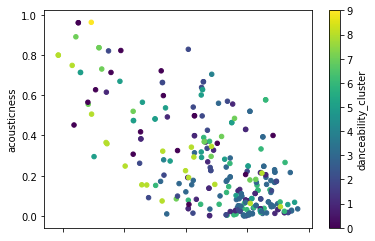

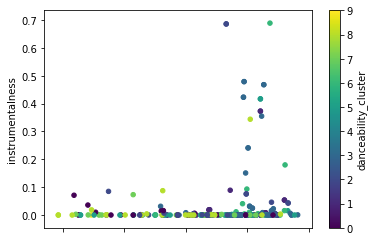

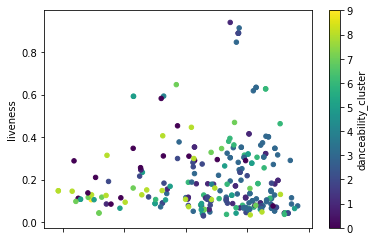

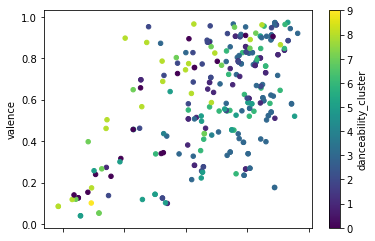

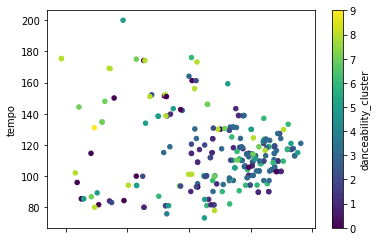

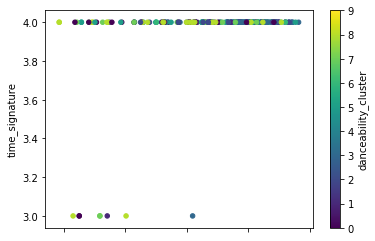

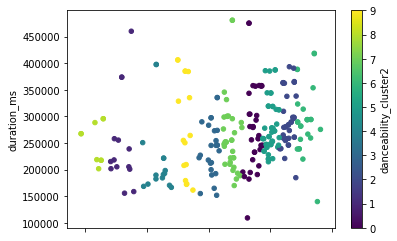

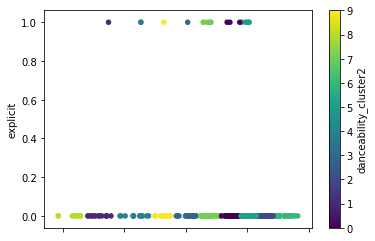

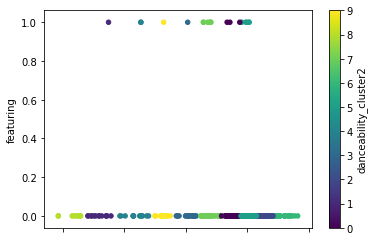

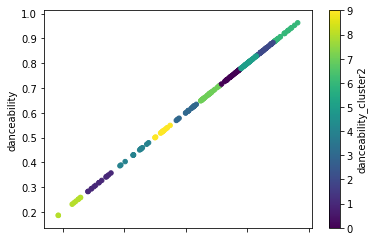

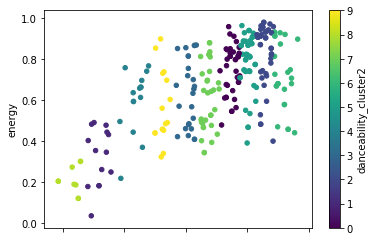

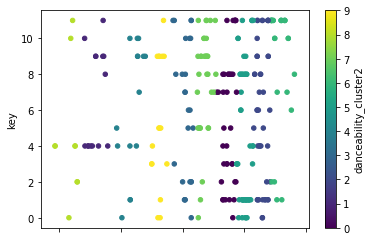

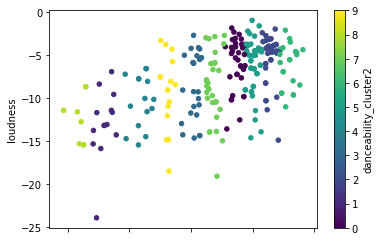

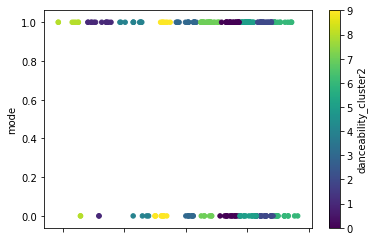

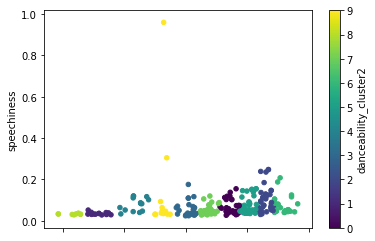

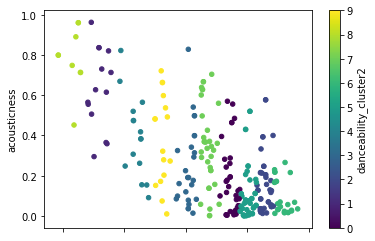

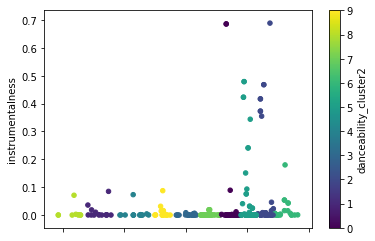

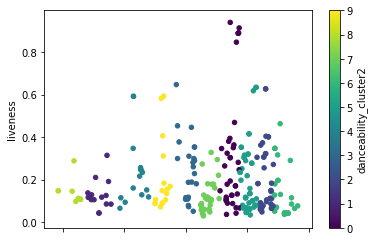

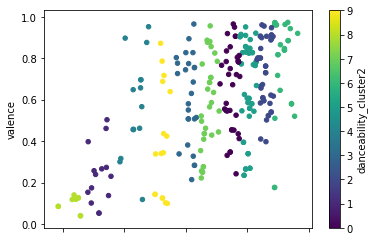

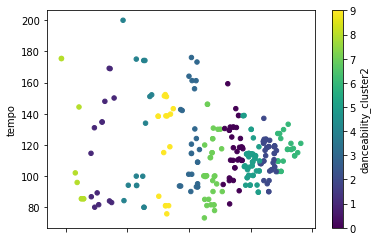

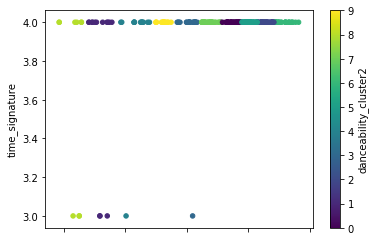

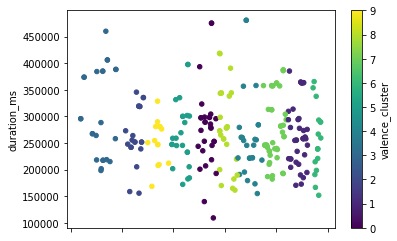

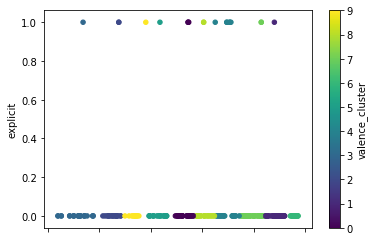

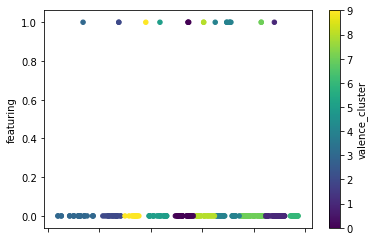

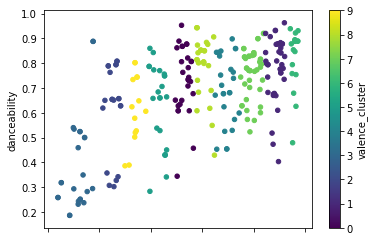

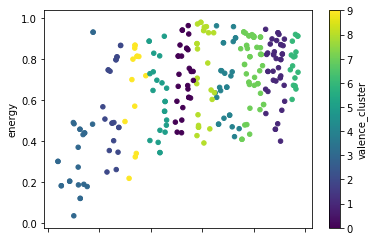

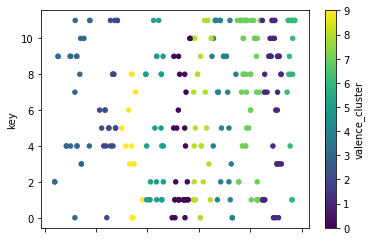

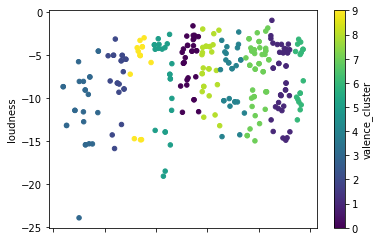

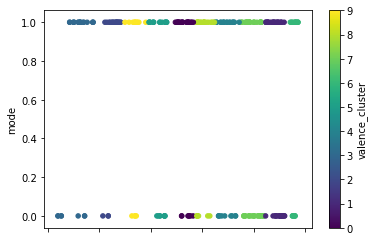

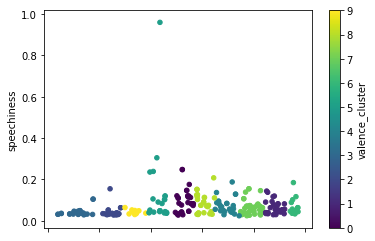

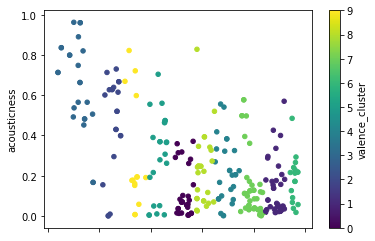

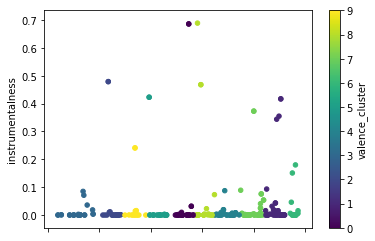

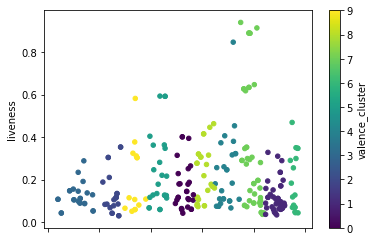

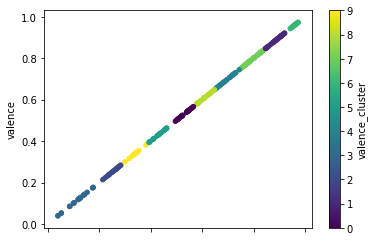

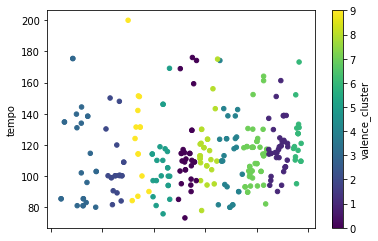

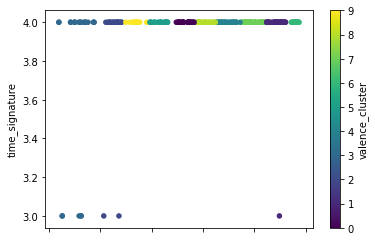

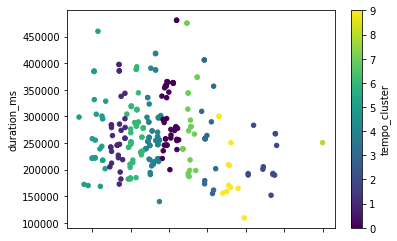

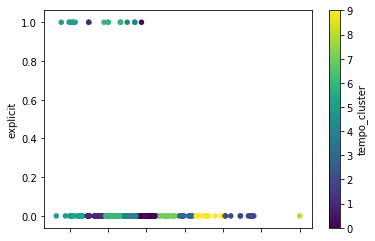

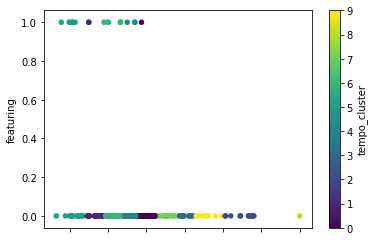

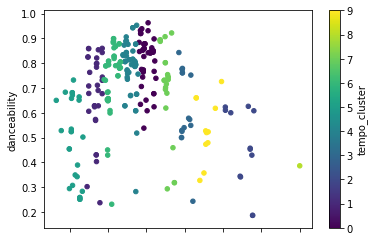

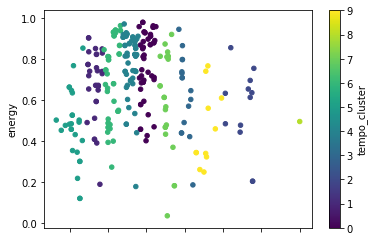

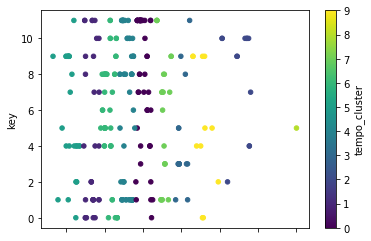

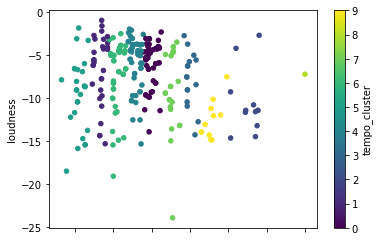

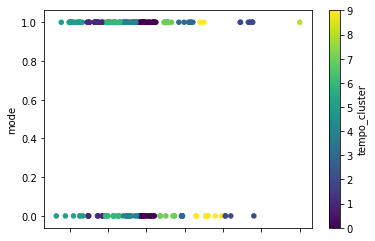

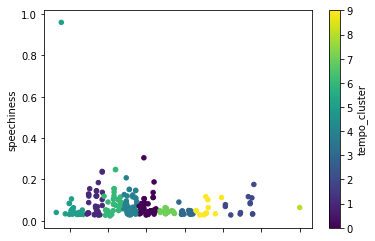

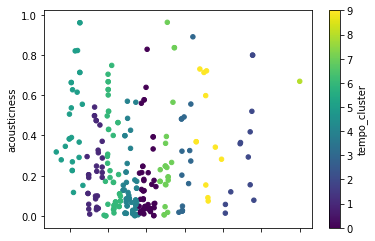

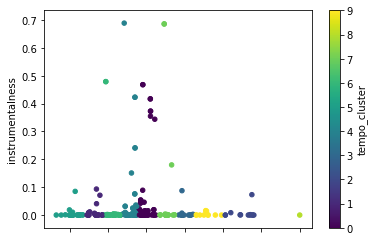

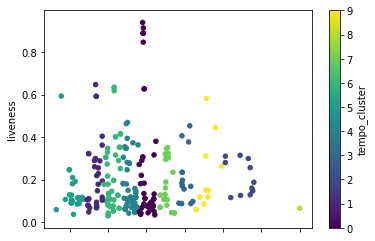

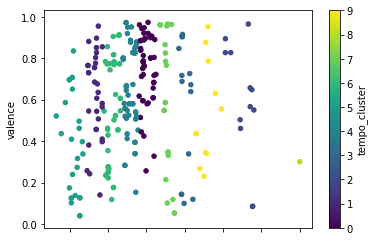

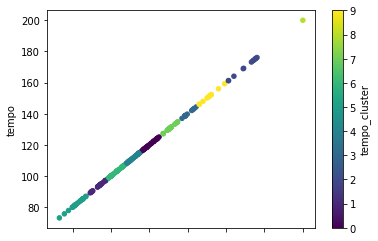

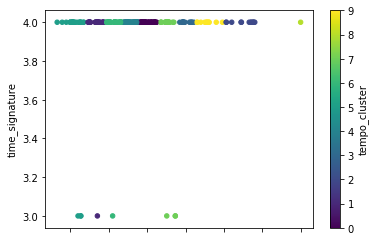

In [17]:
from itertools import permutations 

clusters = {'danceability_cluster': 'danceability', 'danceability_cluster2': 'danceability', 'valence_cluster': 'valence', 'tempo_cluster': 'tempo'}

for cluster in clusters.keys():
    for feature in features:
        analysis_df.plot.scatter(clusters[cluster], feature, c=cluster,colormap='viridis')


# Audio analysis

The audio analysis of the songs is also data we got from the Spotify API.

We get timed information on many aspects of the songs such as bars or beats. 

In [13]:
analysis_df.head()

,name_track,duration_ms,explicit,featuring,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,musicality_cluster,danceability_cluster,danceability_cluster2,valence_cluster,tempo_cluster
0,This Place Hotel (a.k.a. Heartbreak Hotel),343413,0,0,0.731,0.851,4,-4.085,0,0.1030,...,0.000142,0.1170,0.582,97.005,4,8,7,1,0,5
1,Thriller,358053,0,0,0.764,0.887,11,-3.725,1,0.0738,...,0.000108,0.8470,0.721,118.421,4,8,7,1,7,6
2,Blood on the Dance Floor,253373,0,0,0.806,0.816,1,-2.767,1,0.0764,...,0.009780,0.0623,0.520,108.980,4,9,5,8,6,3
3,Somebody's Watching Me - Single Version,237760,0,0,0.767,0.712,1,-4.128,0,0.0324,...,0.000081,0.1320,0.804,124.091,4,1,7,1,4,1
4,Dirty Diana - 2012 Remaster,280946,0,0,0.734,0.801,3,-4.525,1,0.0437,...,0.000401,0.3240,0.331,131.424,4,3,7,1,8,1


In [14]:
analysis_df.iloc[0].bars

AttributeError: 'Series' object has no attribute 'bars'

There are no evident visualization aspects using this audio analysis. We need to do further research on this, as we do see an opportunity to do an indepth comparison between MJ's songs going into the song's structure.

# Temporary conclusion

This data is a great companion to the lyrical analysis. 

As the features require some musical knowledge or research to fully understand what they mean, we did not yet *play* with the features (average them, couple them together...) to see if some plots would be interesting. A great starting point is http://organizeyourmusic.playlistmachinery.com/, from Spotify, that allow users to visualize their playlists using these features, and obtain relevant plots for our final result.

For the audio analysis dataframe, we might not use it, but will keep searching for what has been done to get some insights and inspiration.